In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
def read_and_preprocess(file_name, columns_to_drop, crucial_na_columns):
    df = pd.read_csv(file_name)
    df.dropna(subset = crucial_na_columns, inplace=True)
    df = df.drop(columns=columns_to_drop)
    return df

def extract_country_row(df, country_name):
    df.loc[df['Country Name'] == country_name] = df.loc[df['Country Name'] == country_name].fillna(0)
    return df.loc[df['Country Name'] == country_name]

def plot_country_data(df, country_name, plot_line, plot_connections, starting_year, ending_year, removed_years, title, xlabel, ylabel, filename):  
    y = np.array(extract_country_row(df, country_name).iloc[:, -(ending_year-starting_year+1):]).flatten()
    for i in range(len(y)):
        if y[i] != 0:
            break
    
    print(i)
    
    starting_year += i
    y = y[i:]
    x = np.array(range(starting_year, ending_year + 1))
    values_to_remove_from_x = []
    values_to_remove_from_y = []
    for i in range(len(x)):
        for j in range(len(removed_years)):
            if x[i] == removed_years[j]:
                values_to_remove_from_x.append(x[i])
                values_to_remove_from_y.append(y[i])
    x = [ele for ele in x if ele not in values_to_remove_from_x]
    y = [ele for ele in y if ele not in values_to_remove_from_y]

    
    
    
    m, b = np.polyfit(x, y, 1)
    if (plot_connections):
        plt.scatter(x, y)
        plt.plot(x, y)
    else:
        plt.plot(x, y, 'o')
    if plot_line:
        plt.plot(x, m*x + b)
        print(m)
        print(b)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.savefig(filename)
    
def find_country_to_minimize_column(df, column_name):
    return df[df[column_name] == df[column_name].min()]["Country Name"]
def find_country_to_maximize_column(df, column_name):
    return df[df[column_name] == df[column_name].max()]["Country Name"]


In [14]:
df = read_and_preprocess("agricultural_data.csv", ["Indicator Name", "Indicator Code", "Country Code"], ["2016"])
df

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,NaN,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,...,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111
1,Afghanistan,NaN,57.745918,57.837821,57.914407,58.010906,58.013969,58.072175,58.173268,58.174800,...,58.067580,58.067580,58.067580,58.069111,58.067580,58.067580,58.067580,58.067580,58.067580,58.067580
2,Angola,NaN,45.857063,45.881126,45.897169,45.921232,45.937274,45.961338,45.985401,46.009465,...,46.274164,46.274164,46.755434,46.835646,47.316917,47.316917,47.477340,47.477340,47.477340,47.477340
3,Albania,NaN,44.963504,44.963504,45.000000,44.890511,45.145985,45.255474,45.401460,45.255474,...,40.839416,43.102190,43.843067,43.843067,43.832117,43.843067,43.332119,42.857301,42.857666,43.127735
4,Andorra,NaN,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,...,44.191490,44.170213,44.191490,42.063831,42.063831,39.914894,40.021275,40.021275,40.021275,39.957448
5,Arab World,NaN,27.835643,27.826564,27.845522,27.847925,27.866972,27.866171,27.918594,27.945029,...,36.494163,36.412954,36.372261,36.425990,36.440808,36.472300,36.534503,36.607475,36.624759,36.610850
6,United Arab Emirates,NaN,2.928752,2.928752,2.928752,2.928752,2.942833,2.956914,2.956914,2.956914,...,7.569698,7.668262,5.532244,5.594199,5.540693,5.374543,5.412560,5.456210,5.460434,5.474514
7,Argentina,NaN,50.363395,49.853655,49.283989,48.707380,48.153061,47.849044,47.394115,47.223105,...,52.630367,52.713680,52.542305,53.890284,54.182607,54.538146,54.518049,54.335712,54.335712,54.335712
8,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.534950,61.426064,61.338253,60.941342,59.645240,59.114858,59.114858,59.034069,58.893570,58.897086
9,American Samoa,NaN,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,24.000001,24.000001,24.500000,24.500000,24.500000,24.500000,24.500000,24.500000,24.500000,24.500000


1


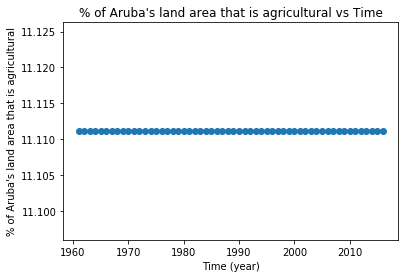

In [16]:
plot_country_data(df, "Aruba", False, True, 1960, 2016, [], "% of Aruba's land area that is agricultural vs Time", "Time (year)", "% of Aruba's land area that is agricultural", "AGGaruba.png")

1


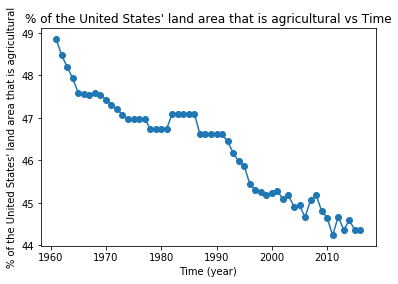

In [18]:
plot_country_data(df, "United States", False, True, 1960, 2016, [], "% of the United States' land area that is agricultural vs Time", "Time (year)", "% of the United States' land area that is agricultural", "AGGus.png")


1


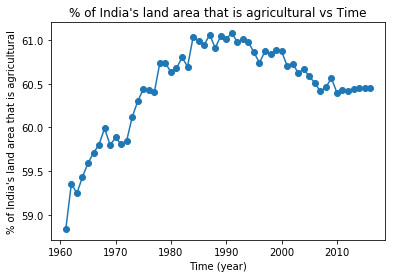

In [20]:
plot_country_data(df, "India", False, True, 1960, 2016, [], "% of India's land area that is agricultural vs Time", "Time (year)", "% of India's land area that is agricultural", "AGGindia.png")


In [22]:
find_country_to_maximize_column(df, "2016")

248    Uruguay
Name: Country Name, dtype: object

In [23]:
find_country_to_minimize_column(df, "2016")

218    Suriname
Name: Country Name, dtype: object

1


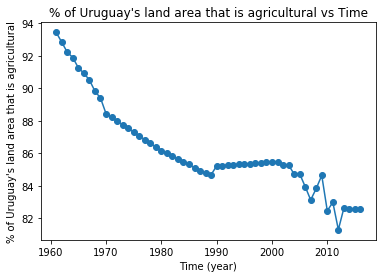

In [24]:
plot_country_data(df, "Uruguay", False, True, 1960, 2016, [], "% of Uruguay's land area that is agricultural vs Time", "Time (year)", "% of Uruguay's land area that is agricultural", "AGGuruguay.png")


1


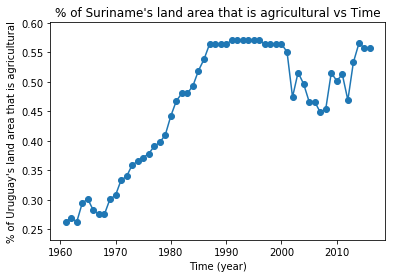

In [25]:
plot_country_data(df, "Suriname", False, True, 1960, 2016, [], "% of Suriname's land area that is agricultural vs Time", "Time (year)", "% of Uruguay's land area that is agricultural", "AGGSuriname.png")
